In [ ]:
import pandas as pd
# Load the stock data
file_path = r'AAPL_short_volume.csv'
data = pd.read_csv(file_path)
close_prices_AAPL = data['Close']

In [ ]:
# Reverse the order of the data
close_prices_AAPL_reverse = close_prices_AAPL.iloc[::-1]

# Reset index to maintain the correct time series order in the plot
close_prices_AAPL_reverse.reset_index(drop=True, inplace=True)

In [ ]:
# 1. Handling Missing Values:
# Check for missing values in each column
print(data.isnull().sum())

# Drop rows with missing values (if not too many)
data.dropna(inplace=True)

# Fill missing values in 'Close' with the mean - Moved before outlier handling
data['Close'].fillna(data['Close'].mean(), inplace=True) # Fill NaNs in 'Close' column

# 2. Handling Outliers:
# (a) Visualization: Create box plots or scatter plots to visually identify outliers.

# (b) Using IQR (Interquartile Range):
# Calculate IQR for relevant numerical columns, e.g., 'Close'
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
data = data[(data['Close'] >= lower_bound) & (data['Close'] <= upper_bound)]

# ... (rest of the code remains the same) ...

Date                343
Short Vol           343
Short Exempt Vol    343
Total Vol           343
% Shorted           343
Close               343
dtype: int64


<ipython-input-11-ed9bde2add09>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close'].fillna(data['Close'].mean(), inplace=True) # Fill NaNs in 'Close' column


In [ ]:
# Data preprocessing
import numpy as np


data = close_prices_AAPL_reverse.values.reshape(-1, 1)  # Reshape the data
data_normalized = data / np.max(data)  # Normalize the data

In [ ]:
# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

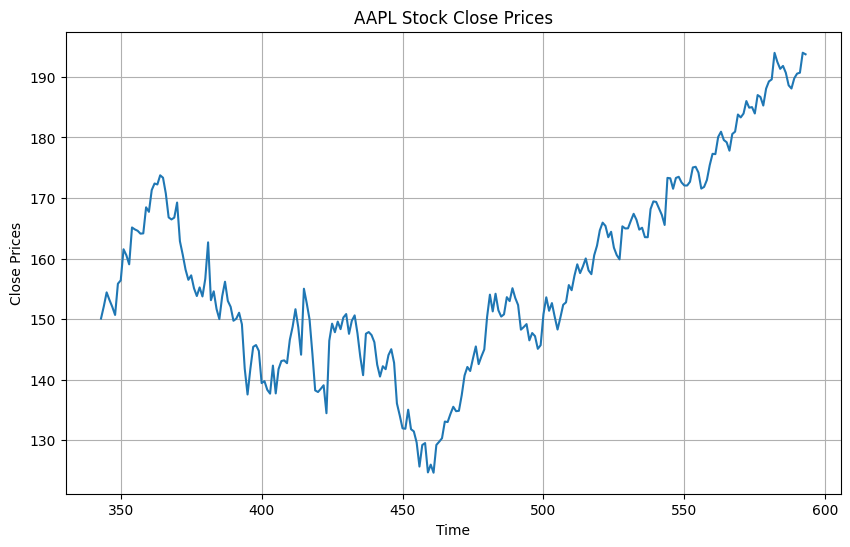

In [ ]:
# Plot the line chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(close_prices_AAPL_reverse)
plt.xlabel('Time')
plt.ylabel('Close Prices')
plt.title('AAPL Stock Close Prices')
plt.grid(True)
plt.show()